In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# EDA

In [3]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [5]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


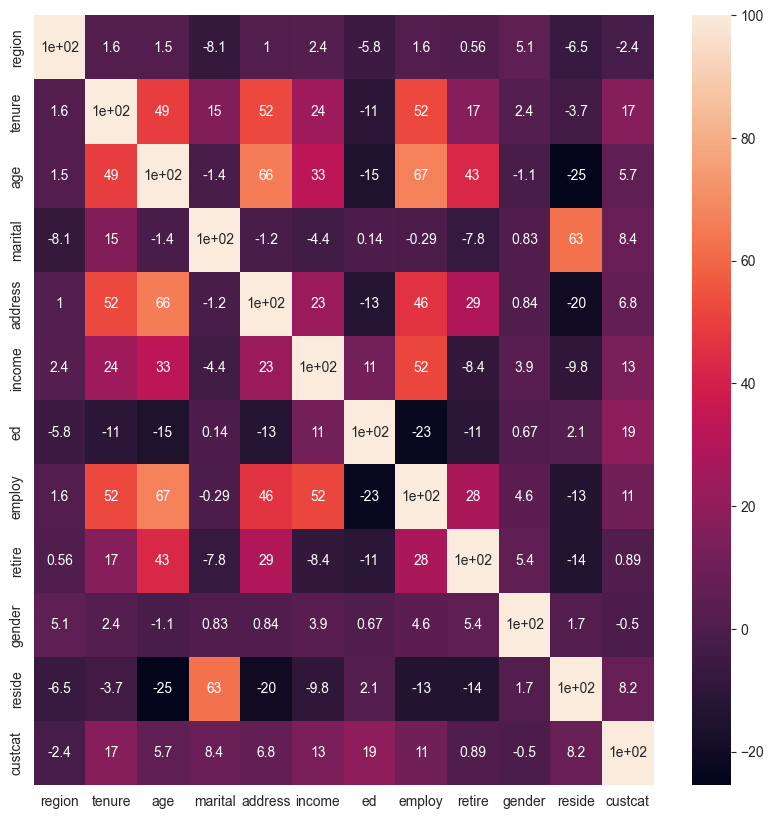

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(100 * df.corr(), annot=True, ax = ax)
plt.show()

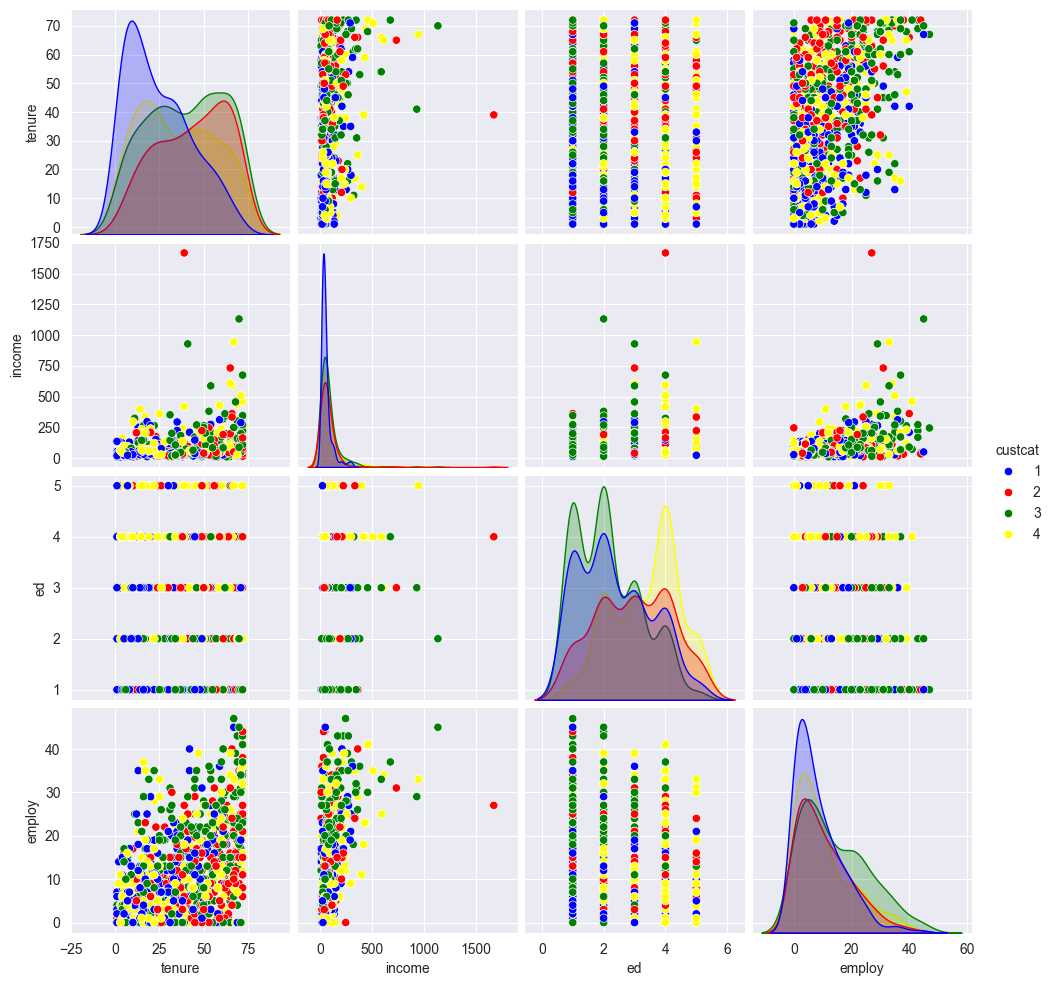

In [7]:
sns.pairplot(df, vars = ['tenure', 'income', 'ed', 'employ'], hue = 'custcat',
             palette = ['blue', 'red', 'green', 'yellow'])
plt.show()

In [8]:
def hexplt(data,x,y, gridsize):
    plt.hexbin(data[x],data[y], gridsize=gridsize,cmap='plasma')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.colorbar()
    plt.show()


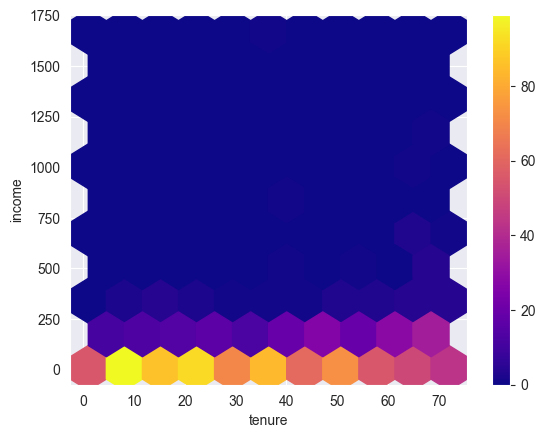

In [9]:
hexplt(df, 'tenure', 'income', 10)

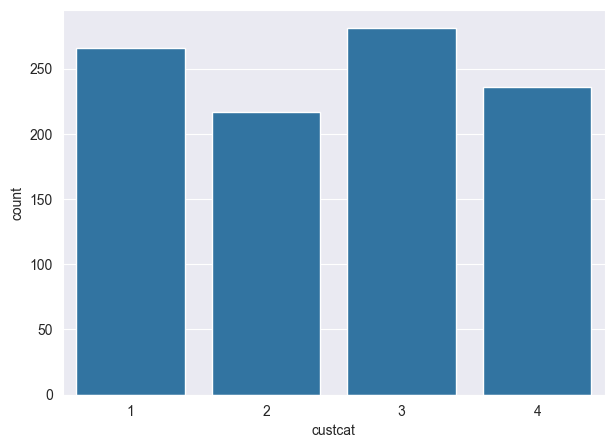

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='custcat')
plt.show()

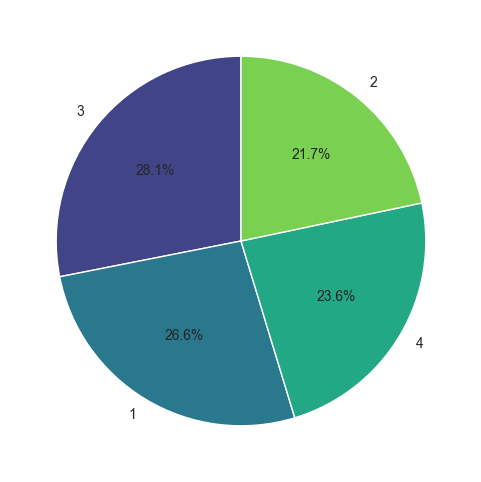

In [11]:
import matplotlib.pyplot as plt

class_counts = df['custcat'].value_counts()
class_percent = df['custcat'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index,
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(class_counts)))
plt.show()

# Preprocess

In [12]:
X = df.drop('custcat', axis=1)
y = df['custcat'] - 1

In [13]:
X[['region', 'ed', 'reside']] = X[['region', 'ed', 'reside']].astype('category')
new_col = pd.get_dummies(X[['region', 'ed', 'reside']], drop_first=True, dtype = 'int')
X = pd.concat([X, new_col], axis=1).drop(['region', 'ed', 'reside'], axis=1)
features = X.columns

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
scaler2 = StandardScaler()
X = scaler2.fit_transform(X)

Feature Selection

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
Lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=2000)
Lasso.fit(X,y)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,2000
,multi_class,'deprecated'


In [18]:
selector1 = SelectFromModel(Lasso, prefit=True)
selected_features1 = features[selector1.get_support()]
selected_features1

Index(['tenure', 'age', 'marital', 'address', 'income', 'employ', 'retire',
       'gender', 'region_2', 'region_3', 'ed_2', 'ed_3', 'ed_4', 'ed_5',
       'reside_2', 'reside_3', 'reside_4', 'reside_5', 'reside_6', 'reside_7',
       'reside_8'],
      dtype='object')

In [19]:
from sklearn.feature_selection import RFE
Rfe = LogisticRegression(penalty = None)
selector2 = RFE(estimator=Rfe)
selector2.fit(X,y)
selected_features2 = features[selector2.get_support()]
selected_features2

Index(['tenure', 'age', 'income', 'employ', 'ed_2', 'ed_3', 'ed_4', 'ed_5',
       'reside_7', 'reside_8'],
      dtype='object')

In [20]:
Logistic1 = LogisticRegression()
Logistic1.fit(X_train[:,selector1.get_support()],y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
from sklearn.metrics import accuracy_score

y_hat_train = Logistic1.predict(X_train[:,selector1.get_support()])
y_hat_test = Logistic1.predict(X_test[:,selector1.get_support()])

print('Accuracy of train:',accuracy_score(y_hat_train, y_train))
print('Accuracy of test:',accuracy_score(y_hat_test, y_test))

Accuracy of train: 0.4657142857142857
Accuracy of test: 0.38333333333333336


In [22]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
print('Confusion Matrix of train:')
confusion_matrix(y_train, y_hat_train)

Confusion Matrix of train:


array([[100,   9,  49,  25],
       [ 19,  50,  44,  39],
       [ 52,  22, 100,  24],
       [ 29,  32,  30,  76]])

In [23]:
print('Confusion Matrix of test:')
confusion_matrix(y_test, y_hat_test)

Confusion Matrix of test:


array([[34,  9, 24, 16],
       [ 8, 13, 23, 21],
       [22,  4, 41, 16],
       [17, 13, 12, 27]])

In [24]:
# fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_hat_train[:,1])
# auc_train = auc(fpr_train, tpr_train)
# fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_hat_test[:,1])
# auc_test = auc(fpr_test, tpr_test)
# plt.plot(fpr_train, tpr_train, label='Train')
# plt.plot(fpr_test, tpr_test, label='Test')
# plt.legend()
# plt.show()

In [25]:
Logistic2 = LogisticRegression()
Logistic2.fit(X_train[:,selector2.get_support()],y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [26]:
y_hat_train = Logistic2.predict(X_train[:,selector2.get_support()])
y_hat_test = Logistic2.predict(X_test[:,selector2.get_support()])

print('Accuracy of train:',accuracy_score(y_hat_train, y_train))
print('Accuracy of test:',accuracy_score(y_hat_test, y_test))

Accuracy of train: 0.4442857142857143
Accuracy of test: 0.38666666666666666


In [27]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
print('Confusion Matrix of train:')
confusion_matrix(y_train, y_hat_train)

Confusion Matrix of train:


array([[101,   9,  47,  26],
       [ 21,  42,  48,  41],
       [ 59,  25,  93,  21],
       [ 29,  31,  32,  75]])

In [28]:
print('Confusion Matrix of test:')
confusion_matrix(y_test, y_hat_test)

Confusion Matrix of test:


array([[35,  9, 21, 18],
       [ 9, 15, 21, 20],
       [24,  8, 38, 13],
       [16, 14, 11, 28]])

In [29]:
# fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_hat_train[:,1])
# auc_train = auc(fpr_train, tpr_train)
# fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_hat_test[:,1])
# auc_test = auc(fpr_test, tpr_test)
# plt.plot(fpr_train, tpr_train, label='Train')
# plt.plot(fpr_test, tpr_test, label='Test')
# plt.legend()
# plt.show()

In [30]:
import numpy as np

In [31]:
coeff_Logistic1 = pd.DataFrame(Logistic1.coef_.T, columns=[f'Class {cls}' for cls in Logistic1.classes_], index=features[selector1.get_support()])
coeff_Logistic1 = pd.concat((coeff_Logistic1, pd.DataFrame(Logistic1.intercept_.reshape(1,-1), columns=[f'Class {cls}' for cls in Logistic1.classes_], index=['Bias'])), axis = 0)
coeff_Logistic1


,Class 0,Class 1,Class 2,Class 3
tenure,-0.742625,0.599382,0.035271,0.107973
age,0.247895,-0.020196,-0.070484,-0.157215
marital,-0.004794,-0.076978,0.036076,0.045696
address,-0.019318,0.009130,-0.058342,0.068529
income,-0.179078,0.057051,0.059669,0.062358
employ,-0.071067,-0.211834,0.213313,0.069588
retire,0.028134,-0.102717,0.069327,0.005256
gender,0.062955,0.014361,-0.035544,-0.041772
region_2,0.094459,-0.039676,-0.098273,0.043490
region_3,0.055418,-0.047469,-0.039076,0.031127


In [32]:
coeff_Logistic2 = pd.DataFrame(Logistic2.coef_.T, columns=[f'Class {cls}' for cls in Logistic2.classes_], index=features[selector2.get_support()])
coeff_Logistic2 = pd.concat((coeff_Logistic2, pd.DataFrame(Logistic2.intercept_.reshape(1,-1), columns=[f'Class {cls}' for cls in Logistic2.classes_], index=['Bias'])), axis = 0)
coeff_Logistic2


,Class 0,Class 1,Class 2,Class 3
tenure,-0.756084,0.595420,0.021954,0.138710
age,0.260003,-0.058681,-0.039275,-0.162047
income,-0.188945,0.086578,0.036584,0.065783
employ,-0.058152,-0.224695,0.215492,0.067354
ed_2,-0.224731,0.021213,-0.279038,0.482555
ed_3,-0.442775,0.253403,-0.335365,0.524736
ed_4,-0.489832,0.214761,-0.555889,0.830960
ed_5,-0.327105,0.273602,-0.465097,0.518600
reside_7,0.224799,-0.066892,-0.088933,-0.068974
reside_8,-0.132826,-0.110495,0.131592,0.111728


In [160]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
Z_train = pca.fit_transform(X_train)
Z_test = pca.transform(X_test)

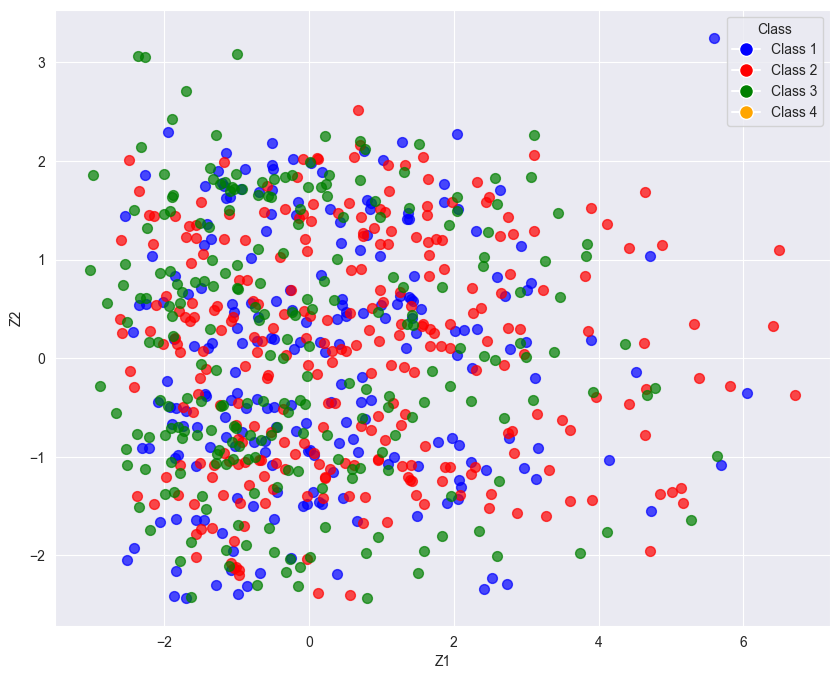

In [161]:
Z_combined = np.concatenate((Z_train, Z_test), axis=0)

y_combined = np.concatenate((y_train, y_test), axis=0)

plt.figure(figsize=(10, 8))
classes = np.unique(y_combined) + 1
colors = ['blue', 'red', 'green', 'orange']
legend_handles = []

for i, class_label in enumerate(classes):
    class_mask = (y_combined == class_label)

    plt.scatter(Z_combined[class_mask, 0], Z_combined[class_mask, 1],
                c=colors[i],
                marker='o',
                s=50,
                alpha=0.7)

    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Class {class_label}',
                                     markerfacecolor=colors[i], markersize=10))

plt.legend(handles=legend_handles,
           title="Class",
           loc="upper right",
           frameon=True)

plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()

In [162]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Lda = LinearDiscriminantAnalysis(n_components = 2)
Z_train = Lda.fit_transform(X_train, y_train)
Z_test = Lda.transform(X_test)

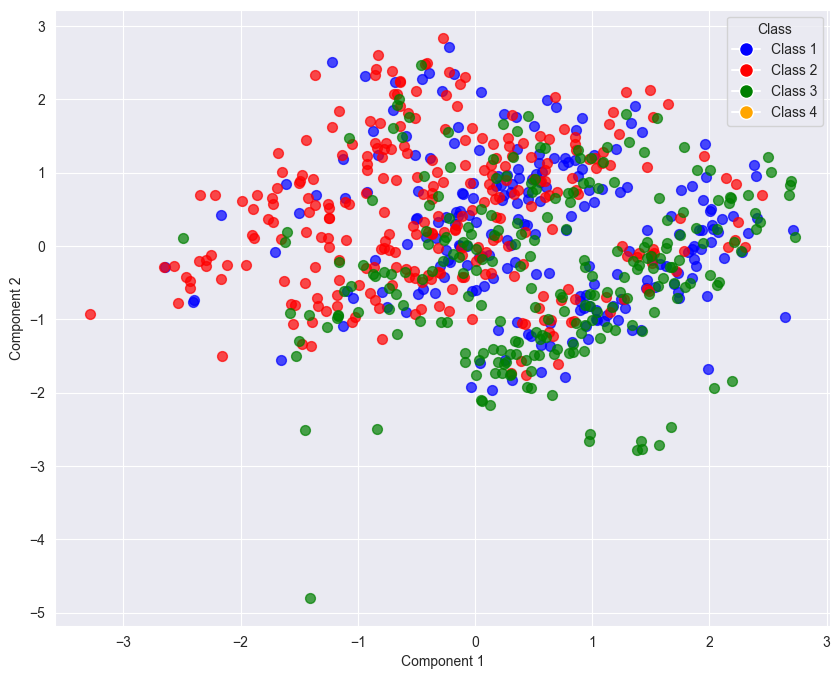

In [163]:
Z_combined = np.concatenate((Z_train, Z_test), axis=0)

y_combined = np.concatenate((y_train, y_test), axis=0)

plt.figure(figsize=(10, 8))
classes = np.unique(y_combined) + 1
colors = ['blue', 'red', 'green', 'orange']
legend_handles = []

for i, class_label in enumerate(classes):
    class_mask = (y_combined == class_label)

    plt.scatter(Z_combined[class_mask, 0], Z_combined[class_mask, 1],
                c=colors[i],
                marker='o',
                s=50,
                alpha=0.7)

    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Class {class_label}',
                                     markerfacecolor=colors[i], markersize=10))

plt.legend(handles=legend_handles,
           title="Class",
           loc="upper right",
           frameon=True)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [62]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

In [99]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test.values)

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

In [171]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_classes=4):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4_embedding = nn.Linear(32, 2)
        self.out = nn.Linear(2, output_classes)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)


    def forward(self, x):
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.relu(self.fc3(x))
        z = self.fc4_embedding(x)
        y = self.out(z)

        return y, z

In [167]:
def train_one_epoch(model, train_loader, loss_fn, optimizer, epoch=None):
    model.train()
    loss_train = []
    with tqdm(train_loader, unit="batch") as tepoch:
        for inputs, targets in tepoch:
            if epoch is not None:
                tepoch.set_description(f"Epoch {epoch}")
            inputs, targets = inputs.to(device), targets.to(device)

            outputs, _ = model(inputs)
            loss = loss_fn(outputs, targets)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            loss_train.append(loss.item())
            avg_loss = sum(loss_train) / len(loss_train)
            tepoch.set_postfix(loss=avg_loss)
    return model

In [173]:
model = MLP(X_train.shape[1], 4)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 300
for epoch in range(1,epochs+1):
    train_one_epoch(model, train_loader, criterion, optimizer, epoch)

Epoch 300: 100%|██████████| 22/22 [00:00<00:00, 221.96batch/s, loss=0.511]


In [174]:
_,Z_train = model(X_train_tensor.to(device))
Z_train = Z_train.cpu().detach().numpy()
_, Z_test = model(X_test_tensor.to(device))
Z_test = Z_test.cpu().detach().numpy()

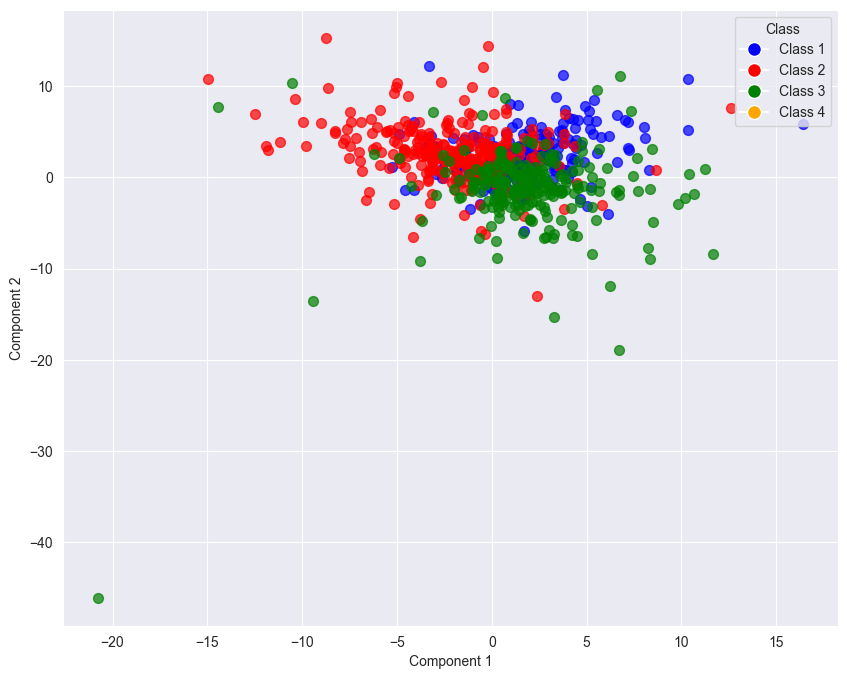

In [175]:
Z_combined = np.concatenate((Z_train, Z_test), axis=0)

y_combined = np.concatenate((y_train, y_test), axis=0)

plt.figure(figsize=(10, 8))
classes = np.unique(y_combined) + 1
colors = ['blue', 'red', 'green', 'orange']
legend_handles = []

for i, class_label in enumerate(classes):
    class_mask = (y_combined == class_label)

    plt.scatter(Z_combined[class_mask, 0], Z_combined[class_mask, 1],
                c=colors[i],
                marker='o', # همه نقاط دایره
                s=50,
                alpha=0.7)

    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Class {class_label}',
                                     markerfacecolor=colors[i], markersize=10))

plt.legend(handles=legend_handles,
           title="Class",
           loc="upper right",
           frameon=True)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()